In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import csv
import pandas as pd

<IPython.core.display.Javascript object>


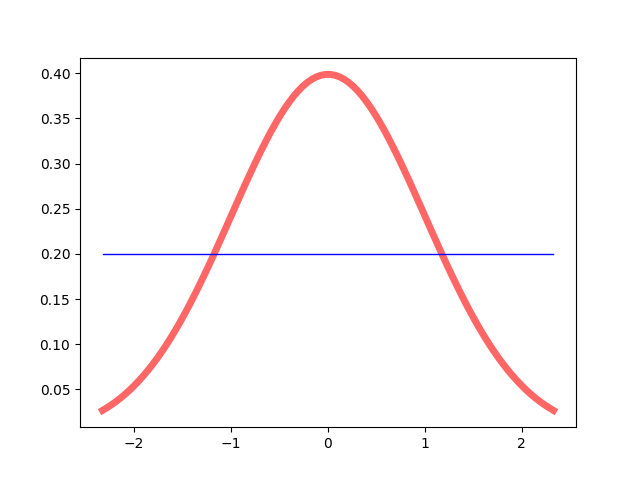

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [3]:
tsv = pd.read_csv("/home/balberti/Documents/S5/protéo/tp1/tp-proteomics/data/TCL_wt1.tsv",delimiter="\t")
tsv=pd.DataFrame(tsv)
tsv=pd.DataFrame.dropna(tsv)
tsv.iloc[:, 3:7]=tsv.iloc[:, 3:7].astype(float)
tsv

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,0.000055,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,0.000351,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,0.000027,4.571899
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,0.019963,1.699768
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183,-3.009460,0.036746,1.434787
...,...,...,...,...,...,...,...
2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535948,0.619129,0.310725,0.507623
2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552288,0.634396,0.013373,1.873757
2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579739,0.659686,0.002226,2.652391
2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754902,0.811390,0.000068,4.164956


<IPython.core.display.Javascript object>


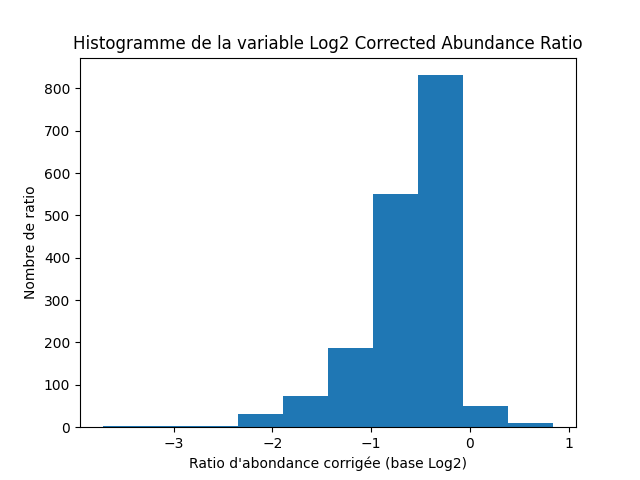

(array([  3.,   4.,   4.,  31.,  74., 187., 551., 831.,  50.,  11.]),
 array([-3.72133494, -3.264559  , -2.80778306, -2.35100711, -1.89423117,
        -1.43745523, -0.98067928, -0.52390334, -0.0671274 ,  0.38964854,
         0.84642449]),
 <BarContainer object of 10 artists>)

In [4]:
log2_CAR=tsv["Log2 Corrected Abundance Ratio"]
plt.figure()
plt.xlabel("Ratio d'abondance corrigée (base Log2)")
plt.ylabel("Nombre de ratio")
plt.title("Histogramme de la variable Log2 Corrected Abundance Ratio")
plt.hist(log2_CAR)

In [5]:
mu=np.mean(log2_CAR)
mu

-0.63862621564433

In [6]:
S_2=np.var(log2_CAR)*np.sqrt(len(log2_CAR)/(len(log2_CAR)+1))
S_2

0.22142403529812052

<IPython.core.display.Javascript object>


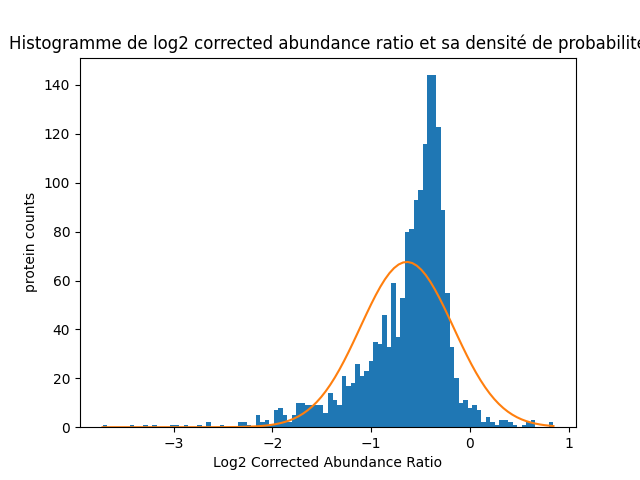

In [7]:
fig, ax = plt.subplots()
hist = ax.hist(log2_CAR, bins=100) # draw histogram
x = np.linspace(min(log2_CAR), max(log2_CAR), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(log2_CAR)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mu, np.sqrt(S_2))*scale) # compute theoritical PDF and draw it

ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel("protein counts")
ax.set_title("Histogramme de log2 corrected abundance ratio et sa densité de probabilité")
plt.show()



<IPython.core.display.Javascript object>


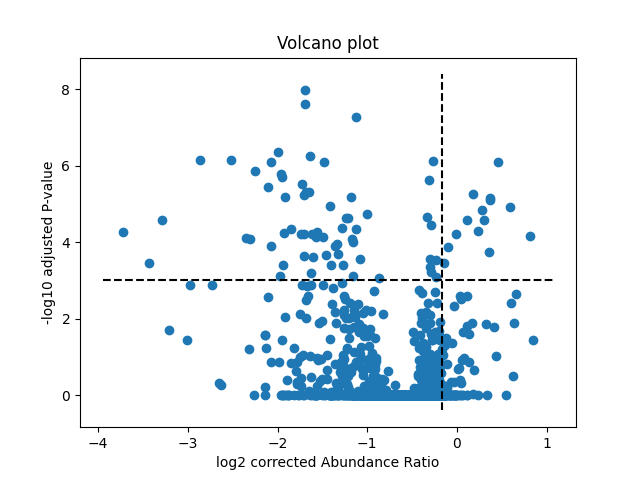

In [8]:
log10_pval=tsv["-LOG10 Adj.P-val"]
fig, ax = plt.subplots()
ax.scatter(log2_CAR,log10_pval)
ax.set_xlabel("log2 corrected Abundance Ratio")
ax.set_ylabel("-log10 adjusted P-value")
ax.set_title("Volcano plot")

log10_lim=3
log2_lim=mu+np.sqrt(S_2) #norm mu+sigma
ax.plot(ax.get_xlim(),(log10_lim,log10_lim),color="black",linestyle="dashed")
ax.plot((log2_lim,log2_lim),ax.get_ylim(),color="black",linestyle="dashed")
ax.plot()
plt.show()

seuil : Alpha = 1*10-3  -log10 de 0.0001 (a gauche) / mu+sigma =-0.17 (a droite) ou -0.28 (tout ce qui est a mu + 1 ecart type est sur abondant)
Donc en gros on prend que ce qui est dans le carré en haut à droite

In [9]:
df_ORA=tsv.loc[(tsv['Log2 Corrected Abundance Ratio']>mu+np.sqrt(S_2)) & (tsv['-LOG10 Adj.P-val']>-np.log10(0.001))]
df_ORA

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
1862,P0A8V6,Fatty acid metabolism regulator protein OS=Esc...,fadR,0.901307,-0.149909,3.510530e-04,3.454627
1898,P0A9Q1,Aerobic respiration control protein ArcA OS=Es...,arcA,0.931373,-0.102570,1.359440e-04,3.866640
1929,P02358,30S ribosomal protein S6 OS=Escherichia coli (...,rpsF,0.990850,-0.013262,6.276360e-05,4.202292
1968,P0ACF8,DNA-binding protein H-NS OS=Escherichia coli (...,hns,1.083007,0.115042,2.679790e-05,4.571899
1977,P62399,50S ribosomal protein L5 OS=Escherichia coli (...,C813_RS16705; C813_RS25010; rplE; AB182_RS27795,1.133987,0.181404,5.518020e-06,5.258216
1979,P0A905,Outer membrane lipoprotein SlyB OS=Escherichia...,slyB,1.173856,0.231256,5.109990e-05,4.291580
1982,P76506,Probable phospholipid-binding lipoprotein MlaA...,mlaA,1.213725,0.279442,1.408320e-05,4.851298
1984,P13036,Fe(3+) dicitrate transport protein FecA OS=Esc...,fecA,1.230719,0.299501,2.679790e-05,4.571899
1989,P10384,Long-chain fatty acid transport protein OS=Esc...,fadL,1.283660,0.360263,1.849300e-04,3.732993
1992,P06971,Ferrichrome outer membrane transporter/phage r...,fhuA,1.293464,0.371240,6.974880e-06,5.156463


In [10]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
# dump(proteins[0])

# Find the xml subtree of a protein with accession "P31224"
identifiant=df_ORA["Accession"]
for iden in identifiant:
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        for acc in accessions:
            if acc.text == iden:
                dump(entry)
                break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="2005-06-07" modified="2020-08-12" version="126">
<ns0:accession>P0A8V6</ns0:accession>
<ns0:accession>P09371</ns0:accession>
<ns0:accession>P76827</ns0:accession>
<ns0:name>FADR_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="2">Fatty acid metabolism regulator protein</ns0:fullName>
</ns0:recommendedName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary" evidence="2">fadR</ns0:name>
<ns0:name type="synonym">oleR</ns0:name>
<ns0:name type="synonym">thdB</ns0:name>
<ns0:name type="ordered locus">b1187</ns0:name>
<ns0:name type="ordered locus">JW1176</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteobacteria</ns0:taxon>
<ns0:taxon>Gammaproteobacteria</ns0:taxon>
<ns0:taxon>Enterobacterales</ns0:taxon>
<ns0:taxon

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1986-07-21" modified="2020-08-12" version="125">
<ns0:accession>P0A9Q1</ns0:accession>
<ns0:accession>P03026</ns0:accession>
<ns0:accession>Q2M5R6</ns0:accession>
<ns0:name>ARCA_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Aerobic respiration control protein ArcA</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>Dye resistance protein</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">arcA</ns0:name>
<ns0:name type="synonym">cpxC</ns0:name>
<ns0:name type="synonym">dye</ns0:name>
<ns0:name type="synonym">fexA</ns0:name>
<ns0:name type="synonym">msp</ns0:name>
<ns0:name type="synonym">seg</ns0:name>
<ns0:name type="synonym">sfrA</ns0:name>
<ns0:name type="ordered locus">b4401</ns0:name>
<ns0:name type="ordered locus">JW4364</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:na

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1986-07-21" modified="2020-08-12" version="211">
<ns0:accession>P02358</ns0:accession>
<ns0:accession>Q2M6A5</ns0:accession>
<ns0:name>RS6_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>30S ribosomal protein S6</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="15">Small ribosomal subunit protein bS6</ns0:fullName>
</ns0:alternativeName>
<ns0:component>
<ns0:recommendedName>
<ns0:fullName>30S ribosomal protein S6, fully modified isoform</ns0:fullName>
</ns0:recommendedName>
</ns0:component>
<ns0:component>
<ns0:recommendedName>
<ns0:fullName>30S ribosomal protein S6, non-modified isoform</ns0:fullName>
</ns0:recommendedName>
</ns0:component>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">rpsF</ns0:name>
<ns0:name type="ordered locus">b4200</ns0:name>
<ns0:name type="ordered locus">JW4158</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific

<ns0:property type="resolution" value="3.00" />
<ns0:property type="chains" value="AF/BF=1-106" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5J88">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.32" />
<ns0:property type="chains" value="AF/BF=1-106" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5J8A">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.10" />
<ns0:property type="chains" value="AF/BF=1-106" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5J91">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.96" />
<ns0:property type="chains" value="AF/BF=1-106" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5JC9">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.03" />
<ns0:property type="chains" value="AF/BF=1-106" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5JTE">
<ns0:property type="method" value="

<ns0:begin position="82" />
<ns0:end position="88" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="3">
<ns0:location>
<ns0:begin position="89" />
<ns0:end position="91" />
</ns0:location>
</ns0:feature>
<ns0:evidence key="1" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="4U26" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="2" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="4U27" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="3" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="4V4Q" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="4" type="ECO:0000244">
<ns0:source>
<ns0:dbReference type="PDB" id="4V9O" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="5" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="10094780" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="6" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="12244297" />
</ns0:source>
</ns0:evidence>
<ns0

<ns0:reference key="13">
<ns0:citation type="journal article" date="1990" name="J. Biochem." volume="108" first="420" last="425">
<ns0:title>An Escherichia coli protein that preferentially binds to sharply curved DNA.</ns0:title>
<ns0:authorList>
<ns0:person name="Yamada H." />
<ns0:person name="Muramatsu S." />
<ns0:person name="Mizuno T." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="2126011" />
<ns0:dbReference type="DOI" id="10.1093/oxfordjournals.jbchem.a123216" />
</ns0:citation>
<ns0:scope>PROTEIN SEQUENCE OF 2-20</ns0:scope>
<ns0:scope>DNA-BINDING</ns0:scope>
</ns0:reference>
<ns0:reference key="14">
<ns0:citation type="journal article" date="1998" name="FEMS Microbiol. Lett." volume="169" first="375" last="382">
<ns0:title>Small genes/gene-products in Escherichia coli K-12.</ns0:title>
<ns0:authorList>
<ns0:person name="Wasinger V.C." />
<ns0:person name="Humphery-Smith I." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="9868784" />
<ns0:dbReference type="DOI

<ns0:person name="Margeat E." />
<ns0:person name="Chavanieu A." />
<ns0:person name="Auge M.T." />
<ns0:person name="Robert B." />
<ns0:person name="Arold S." />
<ns0:person name="Rimsky S." />
<ns0:person name="Kochoyan M." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="12592399" />
<ns0:dbReference type="DOI" id="10.1038/nsb904" />
</ns0:citation>
<ns0:scope>STRUCTURE BY NMR OF 2-47</ns0:scope>
<ns0:scope>DOMAIN</ns0:scope>
<ns0:scope>MUTAGENESIS OF 12-ARG--ARG-15</ns0:scope>
<ns0:scope>COILED COIL</ns0:scope>
</ns0:reference>
<ns0:reference key="54">
<ns0:citation type="journal article" date="2013" name="FEBS J." volume="280" first="2916" last="2928">
<ns0:title>Protein oligomers studied by solid-state NMR--the case of the full-length nucleoid-associated protein histone-like nucleoid structuring protein.</ns0:title>
<ns0:authorList>
<ns0:person name="Renault M." />
<ns0:person name="Garcia J." />
<ns0:person name="Cordeiro T.N." />
<ns0:person name="Baldus M." />
<ns0:pers

<ns0:source ref="16" />
</ns0:evidence>
<ns0:evidence key="51" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="1537791" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="52" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="1691451" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="53" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="2177526" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="54" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="2841565" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="55" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="333393" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="56" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="4566454" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="57" type="ECO:0000303">
<ns0:source>
<ns0:dbReference type="PubMed" id="6395665" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="58" type="E

<ns0:person name="Tajkhorshid E." />
<ns0:person name="Jin H." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="28077875" />
<ns0:dbReference type="DOI" id="10.1038/nature21053" />
</ns0:citation>
<ns0:scope>STRUCTURE BY ELECTRON MICROSCOPY (3.52 ANGSTROMS) OF 70S RIBOSOME IN COMPLEX WITH ARFA AND RF2</ns0:scope>
<ns0:scope>SUBUNIT</ns0:scope>
</ns0:reference>
<ns0:comment type="function">
<ns0:text evidence="14 15 18">This is 1 of the proteins that binds and probably mediates the attachment of the 5S RNA into the large ribosomal subunit, where it forms part of the central protuberance. Its 5S rRNA binding is significantly enhanced in the presence of L18.</ns0:text>
</ns0:comment>
<ns0:comment type="function">
<ns0:text evidence="4 5 6">In the 70S ribosome in the initiation state (PubMed:12809609) was modeled to contact protein S13 of the 30S subunit (bridge B1b), connecting the 2 subunits; the protein-protein contacts between S13 and L5 in B1b change in the model with bound EF-

<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="4.80" />
<ns0:property type="chains" value="F=2-178" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5NP6">
<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="3.60" />
<ns0:property type="chains" value="d=2-178" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5NWY">
<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="2.93" />
<ns0:property type="chains" value="S=1-179" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5O2R">
<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="3.40" />
<ns0:property type="chains" value="F=2-178" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5U4I">
<ns0:property type="method" value="EM" />
<ns0:property type="resolution" value="3.50" />
<ns0:property type="chains" value="F=1-179" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="5U9F">
<ns0:property type="metho

<ns0:location>
<ns0:begin position="111" />
<ns0:end position="113" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="2">
<ns0:location>
<ns0:begin position="124" />
<ns0:end position="126" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="2">
<ns0:location>
<ns0:begin position="128" />
<ns0:end position="133" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="2">
<ns0:location>
<ns0:begin position="135" />
<ns0:end position="137" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="2">
<ns0:location>
<ns0:begin position="138" />
<ns0:end position="141" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="143" />
<ns0:end position="145" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="2">
<ns0:location>
<ns0:begin position="152" />
<ns0:end position="158" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="2">
<n

<ns0:dbReference type="BioCyc" id="ECOL316407:JW2343-MONOMER" />
<ns0:dbReference type="PRO" id="PR:P76506" />
<ns0:dbReference type="Proteomes" id="UP000000318">
<ns0:property type="component" value="Chromosome" />
</ns0:dbReference>
<ns0:dbReference type="Proteomes" id="UP000000625">
<ns0:property type="component" value="Chromosome" />
</ns0:dbReference>
<ns0:dbReference type="GO" id="GO:0009279">
<ns0:property type="term" value="C:cell outer membrane" />
<ns0:property type="evidence" value="ECO:0000501" />
<ns0:property type="project" value="UniProtKB-SubCell" />
</ns0:dbReference>
<ns0:dbReference type="GO" id="GO:0120010">
<ns0:property type="term" value="P:intermembrane phospholipid transfer" />
<ns0:property type="evidence" value="ECO:0000314" />
<ns0:property type="project" value="EcoCyc" />
</ns0:dbReference>
<ns0:dbReference type="InterPro" id="IPR007428">
<ns0:property type="entry name" value="MlaA" />
</ns0:dbReference>
<ns0:dbReference type="PANTHER" id="PTHR30035">
<ns0:p

<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="127" />
<ns0:end position="131" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="1">
<ns0:location>
<ns0:begin position="137" />
<ns0:end position="141" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="142" />
<ns0:end position="144" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="146" />
<ns0:end position="148" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="153" />
<ns0:end position="157" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="2">
<ns0:location>
<ns0:begin position="174" />
<ns0:end position="177" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="1">
<ns0:location>
<ns0:begin position="188" />
<ns0:end position="190" />
</ns0:location>
</ns0:feature>
<ns0

<ns0:property type="resolution" value="2.90" />
<ns0:property type="chains" value="A/B=26-446" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="2R88">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.60" />
<ns0:property type="chains" value="A/B=26-446" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="2R89">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.40" />
<ns0:property type="chains" value="A/B=31-446" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="2R8A">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.00" />
<ns0:property type="chains" value="A/B=36-446" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="3DWN">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.50" />
<ns0:property type="chains" value="A/B=26-446" />
</ns0:dbReference>
<ns0:dbReference type="PDB" id="3PF1">
<ns0:property type="method" value="X-ray

<ns0:person name="Postle K." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="9353297" />
<ns0:dbReference type="DOI" id="10.1074/jbc.272.45.28391" />
</ns0:citation>
<ns0:scope>FUNCTION</ns0:scope>
<ns0:scope>ACTIVITY REGULATION</ns0:scope>
<ns0:scope>INTERACTION WITH TONB</ns0:scope>
<ns0:scope>DOMAIN</ns0:scope>
</ns0:reference>
<ns0:reference key="14">
<ns0:citation type="journal article" date="2002" name="Microbiology" volume="148" first="3497" last="3509">
<ns0:title>TonB of Escherichia coli activates FhuA through interaction with the beta-barrel.</ns0:title>
<ns0:authorList>
<ns0:person name="Killmann H." />
<ns0:person name="Herrmann C." />
<ns0:person name="Torun A." />
<ns0:person name="Jung G." />
<ns0:person name="Braun V." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="12427941" />
<ns0:dbReference type="DOI" id="10.1099/00221287-148-11-3497" />
</ns0:citation>
<ns0:scope>FUNCTION</ns0:scope>
<ns0:scope>ACTIVITY REGULATION</ns0:scope>
<ns0:scope>INTERACTION

<ns0:feature type="turn" evidence="9">
<ns0:location>
<ns0:begin position="68" />
<ns0:end position="70" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="9">
<ns0:location>
<ns0:begin position="76" />
<ns0:end position="78" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="9">
<ns0:location>
<ns0:begin position="83" />
<ns0:end position="87" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="9">
<ns0:location>
<ns0:begin position="88" />
<ns0:end position="94" />
</ns0:location>
</ns0:feature>
<ns0:feature type="helix" evidence="9">
<ns0:location>
<ns0:begin position="99" />
<ns0:end position="102" />
</ns0:location>
</ns0:feature>
<ns0:feature type="turn" evidence="9">
<ns0:location>
<ns0:begin position="103" />
<ns0:end position="105" />
</ns0:location>
</ns0:feature>
<ns0:feature type="strand" evidence="9">
<ns0:location>
<ns0:begin position="106" />
<ns0:end position="111" />
</ns0:location>
</ns0:feature>
<ns0:feature ty

<ns0:name type="synonym" evidence="51">con</ns0:name>
<ns0:name type="synonym" evidence="50">tolG</ns0:name>
<ns0:name type="synonym" evidence="49">tut</ns0:name>
<ns0:name type="ordered locus">b0957</ns0:name>
<ns0:name type="ordered locus">JW0940</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference type="NCBI Taxonomy" id="83333" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteobacteria</ns0:taxon>
<ns0:taxon>Gammaproteobacteria</ns0:taxon>
<ns0:taxon>Enterobacterales</ns0:taxon>
<ns0:taxon>Enterobacteriaceae</ns0:taxon>
<ns0:taxon>Escherichia</ns0:taxon>
</ns0:lineage>
</ns0:organism>
<ns0:reference key="1">
<ns0:citation type="journal article" date="1980" name="Nucleic Acids Res." volume="8" first="3011" last="3027">
<ns0:title>Nucleotide sequence of the gene ompA coding the outer membrane protein II of Escherichia coli K-12.</ns0:title>
<ns0:authorList>
<ns0:person name="Beck E." />
<ns0:person

<ns0:person name="Boags A." />
<ns0:person name="Piggot T.J." />
<ns0:person name="Khalid S." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="28978443" />
<ns0:dbReference type="DOI" id="10.1016/j.bpj.2017.08.011" />
</ns0:citation>
<ns0:scope>MODELING OF FUNCTION</ns0:scope>
<ns0:scope>DOMAIN</ns0:scope>
<ns0:scope>PEPTIDOGLYCAN-BINDING</ns0:scope>
</ns0:reference>
<ns0:reference key="44">
<ns0:citation type="journal article" date="2019" name="Structure" volume="27" first="713" last="724">
<ns0:title>Binding from both sides: TolR and full-length OmpA bind and maintain the local structure of the E. coli cell wall.</ns0:title>
<ns0:authorList>
<ns0:person name="Boags A.T." />
<ns0:person name="Samsudin F." />
<ns0:person name="Khalid S." />
</ns0:authorList>
<ns0:dbReference type="PubMed" id="30713026" />
<ns0:dbReference type="DOI" id="10.1016/j.str.2019.01.001" />
</ns0:citation>
<ns0:scope>MODELING OF FUNCTION</ns0:scope>
<ns0:scope>DOMAIN</ns0:scope>
<ns0:scope>PEPTIDOGLYCAN

<ns0:position position="91" />
</ns0:location>
</ns0:feature>
<ns0:feature type="mutagenesis site" description="Becomes sensitive to phages K4, K5, K3h1, partially sensitive to phages TuII*-6, TuII*-24, K3, M1." evidence="36 38">
<ns0:original>G</ns0:original>
<ns0:variation>D</ns0:variation>
<ns0:location>
<ns0:position position="91" />
</ns0:location>
</ns0:feature>
<ns0:feature type="mutagenesis site" description="Becomes partially sensitive to phages K3h1, M1." evidence="36 38">
<ns0:original>G</ns0:original>
<ns0:variation>R</ns0:variation>
<ns0:variation>V</ns0:variation>
<ns0:location>
<ns0:position position="91" />
</ns0:location>
</ns0:feature>
<ns0:feature type="mutagenesis site" description="Decreased channel activity; channel opens less time and less often than wild-type." evidence="22">
<ns0:original>K</ns0:original>
<ns0:variation>A</ns0:variation>
<ns0:location>
<ns0:position position="103" />
</ns0:location>
</ns0:feature>
<ns0:feature type="mutagenesis site" descriptio

<ns0:comment type="similarity">
<ns0:text evidence="11">Belongs to the Gram-negative porin family.</ns0:text>
</ns0:comment>
<ns0:dbReference type="EMBL" id="K00541">
<ns0:property type="protein sequence ID" value="AAA24243.1" />
<ns0:property type="molecule type" value="Genomic_DNA" />
</ns0:dbReference>
<ns0:dbReference type="EMBL" id="U00096">
<ns0:property type="protein sequence ID" value="AAC75275.1" />
<ns0:property type="molecule type" value="Genomic_DNA" />
</ns0:dbReference>
<ns0:dbReference type="EMBL" id="AP009048">
<ns0:property type="protein sequence ID" value="BAA15998.1" />
<ns0:property type="molecule type" value="Genomic_DNA" />
</ns0:dbReference>
<ns0:dbReference type="EMBL" id="U00008">
<ns0:property type="protein sequence ID" value="AAA16412.1" />
<ns0:property type="molecule type" value="Genomic_DNA" />
</ns0:dbReference>
<ns0:dbReference type="PIR" id="A20867">
<ns0:property type="entry name" value="MMECPC" />
</ns0:dbReference>
<ns0:dbReference type="RefSeq" id="

<ns0:dbReference type="PubMed" id="28423182" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="7" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="3010044" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="8" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="6297988" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="9" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="9298646" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="10" type="ECO:0000269">
<ns0:source>
<ns0:dbReference type="PubMed" id="9629924" />
</ns0:source>
</ns0:evidence>
<ns0:evidence key="11" type="ECO:0000305" />
<ns0:evidence key="12" type="ECO:0000305">
<ns0:source>
<ns0:dbReference type="PubMed" id="27723824" />
</ns0:source>
</ns0:evidence>
<ns0:sequence length="367" mass="40368" checksum="6A49370CC8A1A225" modified="1988-04-01" version="1" precursor="true">MKVKVLSLLVPALLVAGAANAAEVYNKDGNKLDLYGKVDGLHYFSDNKDVDGDQTYMRLGFKGETQVTDQLTGYGQWEYQIQGNSAENENNSWTR

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" dataset="Swiss-Prot" created="1986-07-21" modified="2020-08-12" version="201">
<ns0:accession>P02931</ns0:accession>
<ns0:name>OMPF_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Outer membrane porin F</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>Outer membrane protein 1A</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Outer membrane protein B</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Outer membrane protein F</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Outer membrane protein IA</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Porin OmpF</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">ompF</ns0:name>
<ns0:name type="synonym">cmlB</ns0:name>
<ns0:name type="synonym">coa</ns0:name>
<ns0:name type="synonym">cry</ns0:name>
<ns0:name type="syn

<ns0:property type="generic name" value="Minocycline" />
</ns0:dbReference>
<ns0:dbReference type="DrugBank" id="DB07084">
<ns0:property type="generic name" value="N-(6,7,9,10,17,18,20,21-octahydrodibenzo[b,k][1,4,7,10,13,16]hexaoxacyclooctadecin-2-yl)acetamide" />
</ns0:dbReference>
<ns0:dbReference type="TCDB" id="1.B.1.1.1">
<ns0:property type="family name" value="the general bacterial porin (gbp) family" />
</ns0:dbReference>
<ns0:dbReference type="SWISS-2DPAGE" id="P02931" />
<ns0:dbReference type="jPOST" id="P02931" />
<ns0:dbReference type="PaxDb" id="P02931" />
<ns0:dbReference type="PRIDE" id="P02931" />
<ns0:dbReference type="EnsemblBacteria" id="AAC74015">
<ns0:property type="protein sequence ID" value="AAC74015" />
<ns0:property type="gene ID" value="b0929" />
</ns0:dbReference>
<ns0:dbReference type="EnsemblBacteria" id="BAA35675">
<ns0:property type="protein sequence ID" value="BAA35675" />
<ns0:property type="gene ID" value="BAA35675" />
</ns0:dbReference>
<ns0:dbReferen

J'ai récupéré ces résultats et utilisé sublim text pour ne récupérer que les identifiants Go d'intérêts. C'est une opération manuelle mais je n'arrivais pas à le faire avec un code. Il était plus important pour moi de contourner le problème pour continuer le TP.

In [11]:
go_id=open("data/Go_id.txt",'r')
liste=[]
for line in go_id:
    liste.append(line)
liste_seule=set(liste)
print(len(liste))
len(liste_seule)

124


82